# Cranberry Bog Maps

### Create maps of the cranberry bogs located in the MA saltmarshes

In [1]:
# Import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from matplotlib.colors import ListedColormap

In [2]:
# data paths
RAW_DATA = "../data/raw/"
CLEAN_DATA = "../data/clean/"
OUTPUT = "../output/"

In [8]:
# Read in MASS DEP Wetlands file
mass_wetlands = gpd.read_file(RAW_DATA + "wetlandsdep/WETLANDSDEP_POLY.shp")

# just pull out the cranberry bog locations
mass_cran = mass_wetlands[mass_wetlands['IT_VALDESC'] == 'CRANBERRY BOG']

In [33]:
#create geodataframe from latitutde and longitude points
restored_cran = {'bog_name': ['Lower Coonamessett Bog', 'Middle Coonamessett Bog', 'Upper Coonamesstt Bog', 'Childs River - Carriage shop rd unit south of replaced culvert',
                              'Childs River - Carriage shop rd unit north of replaced culvert', 'Childs River - Farley Bog', 'Childs River - Garner Bogs' ],
                 'Latitude': [41.583546, 41.587366, 41.591394, 41.592690, 41.593951, 41.599040, 41.606683],
                 'Longitude': [-70.572931, -70.572867, -70.571901, -70.524748, -70.524745, -70.524477, -70.523450]}
cc1_restored_cran = gpd.GeoDataFrame(restored_cran, geometry=gpd.points_from_xy(restored_cran['Longitude'], restored_cran['Latitude']), crs='EPSG:4326')
cc1_restored_cran = cc1_restored_cran.to_crs(epsg=3857)
cc1_restored_cran.to_file(CLEAN_DATA + "cran_bogs/cc1_cran_restored.geojson")

In [25]:
restored_cran

,bog_name,Latitude,Longitude,geometry
0,Lower Coonamessett Bog,41.583546,-70.572931,POINT (-70.57293 41.58355)
1,Middle Coonamessett Bog,41.587366,-70.572867,POINT (-70.57287 41.58737)
2,Upper Coonamesstt Bog,41.591394,-70.571901,POINT (-70.57190 41.59139)
3,Childs River - Carriage shop rd unit south of ...,41.592690,-70.524748,POINT (-70.52475 41.59269)
4,Childs River - Carriage shop rd unit north of ...,41.593951,-70.524745,POINT (-70.52474 41.59395)
5,Childs River - Farley Bog,41.599040,-70.524477,POINT (-70.52448 41.59904)
6,Childs River - Garner Bogs,41.606683,-70.523450,POINT (-70.52345 41.60668)


In [9]:
# function to crop the MA cranberry bogs to the extent of the marsh
def crop_cran(which_marsh, mass_cran):
    marsh_extent = gpd.read_file(CLEAN_DATA + f'slamm/{which_marsh}/{which_marsh}_1slr_40_sm_00.geojson')
    mass_cran_crs = mass_cran.to_crs(marsh_extent.crs)
    marsh_cran = gpd.clip(mass_cran_crs, marsh_extent)
    marsh_cran.to_file(CLEAN_DATA + f"cran_bogs/{which_marsh}_cran.geojson")

    return marsh_cran

In [10]:
# Crop
ma2_cran = crop_cran('ma2', mass_cran)
cc1_cran = crop_cran('cc1', mass_cran)

In [13]:
cc1_extent = gpd.read_file(CLEAN_DATA + 'slamm/cc1/cc1_1slr_40_sm_00.geojson')

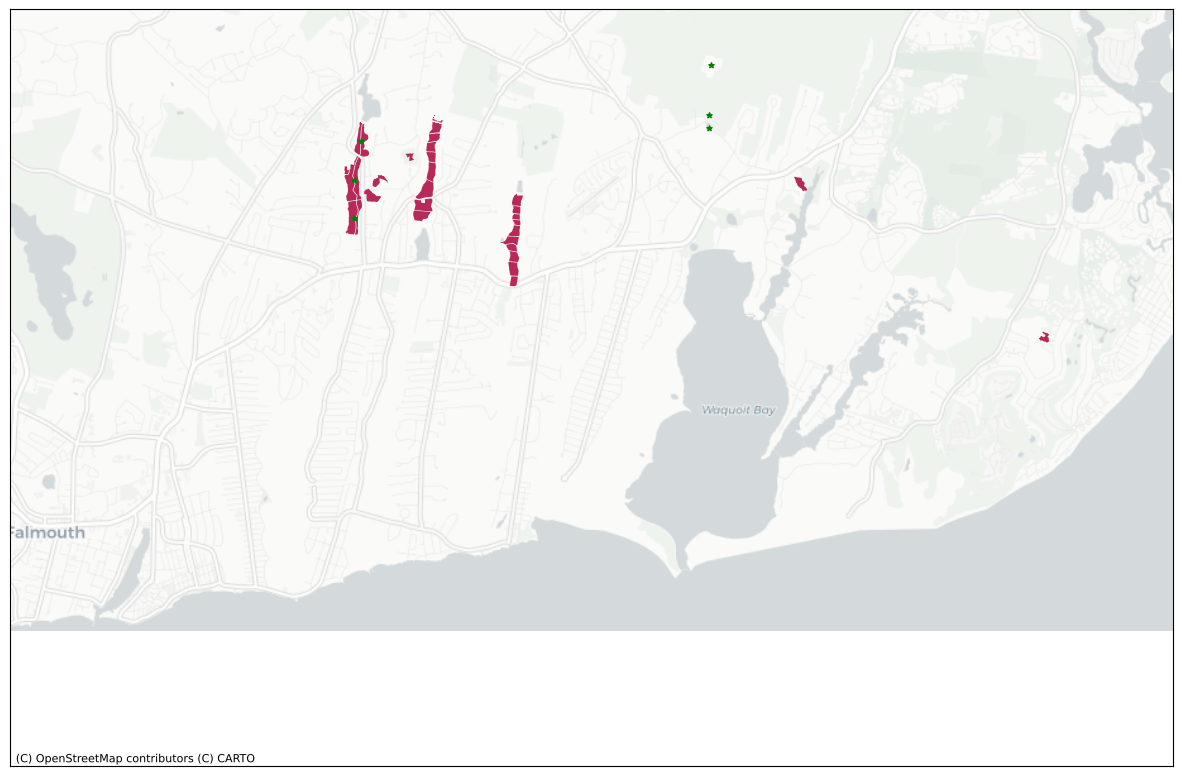

In [32]:
# Map the cranberry bogs around each marsh
marsh_extent = cc1_extent
which_cran = cc1_cran

# set x and y limits
xlim = (marsh_extent.total_bounds[0],  marsh_extent.total_bounds[2])
ylim = (marsh_extent.total_bounds[1],  marsh_extent.total_bounds[3])

# Make map
fig, ax = plt.subplots(figsize=(15, 10))
which_cran.plot(ax=ax, 
                   color = '#b62959')
cc1_restored_cran.plot(ax=ax, color='green', marker='*', markersize=15)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs = which_cran.crs, zoom=13)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xticks([])
ax.set_yticks([])
ax

# Save map
fig.savefig(OUTPUT + "cc1/cranberry_bogs_and_restored.jpeg", dpi=350, bbox_inches="tight")